# Interior-Point Methods (IPM)

Penalty-, Barrier-, and Interior-Point Methods are a group of methods
that solve constrained optimization problems
iteratively by solving a sequence of unconstrained optimization problems
and penalizing the violation of constraints:

- **Penalty Methods:** impose a penalty for violating a constraint
- **Barrier methods, IPM:** impose a penalty for reaching the boundary
  of an inequality constraint

**Idea:** Suppose that the constrained optimization problem has the form

$$
\begin{array}{ll}
\textrm{minimize}   & f(x)    \\
\textrm{subject to} & x \in X.
\end{array}
$$

Define $\mathfrak{b}(x) = 0$ for $x \in X$
and $\mathfrak{b}(x) = +\infty$ otherwise **(penalty)**.
Then the constrained problem is equivalent to the unconstrained problem

$$
\textrm{minimize}\quad f(x) {\color{red}{\;+\;\mathfrak{b}(x)}}
$$

for all $x \in \mathbb{R}^{n}$.

Consider the non-linear inequality-constrained optimization problem

$$
\begin{array}{lll}
\textrm{minimize}   &     f(x)         & \\
\textrm{subject to} & g_{j}(x) \geq 0, & j = 1, \ldots, m.
\end{array}
$$

IPMs maintain feasibility
by creating a barrier function $\beta(x,\mu)$
keeping the iterates $x(\mu^{k})$
for decreasing $\mu = \mu^{k} \to 0$
away from the boundary of the feasible region:

$$
\begin{array}{lrll}
\textrm{minimize}   & \beta(x,\mu) &:= f(x) {\color{red}{\;-\; \mu \displaystyle\sum_{j = 1}^{m}\log(g_{j}(x))}} & \\
\textrm{subject to} & g_{j}(x) &> 0, & j = 1, \ldots, m, \\
& \mu &> 0. &
\end{array}
$$

**Example:** $\beta(x,\mu) := 0 - \mu\left( \log(x - a) + \log(b - x) \right)$,
notice that $f(x) \equiv 0$ implies that each feasible point $x \in [a, b]$ is optimal.

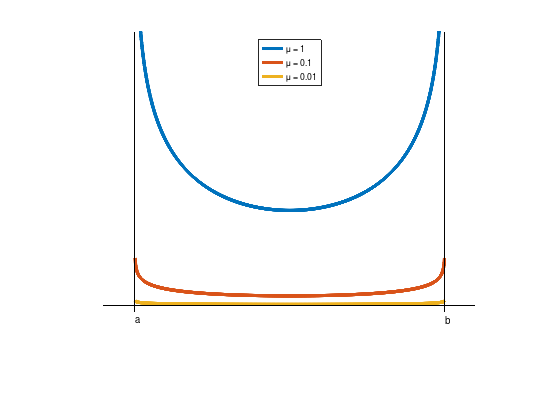

In [1]:
a = 1;
b = 2;
beta = @(x,mu) 0 - mu * (log (x - a) + log (b - x));
mu = [1; 0.1; 0.01];
x = linspace (a, b, 1000);
y = beta (x, mu);
plot (x, y, 'LineWidth', 4);
hold on;
plot ([a - 0.1, b + 0.1], [0, 0], 'k');
plot ([a, a], [-0.1, 4], 'k');
plot ([b, b], [-0.1, 4], 'k');
ylim ([-1 4]);
legend (strcat ({'\mu = '}, ...
  cellfun (@num2str, num2cell (mu), ...
    'UniformOutput', false)), ...
  'Location', 'North');
text (a, -0.2, 'a');
text (b, -0.2, 'b');
axis off;

## IPM: Example 1 - Barrier Method

Consider the non-linear optimization problem:

$$
\begin{array}{llll}
\textrm{minimize}   & f(x_{1}, x_{2})     =& x_{1} - 2 x_{2} & \\
\textrm{subject to} & g_{1}(x_{1}, x_{2}) =& 1 + x_{1} - x_{2}^{2} &\geq 0, \\
& g_{2}(x_{1}, x_{2}) =& x_{2} &\geq 0.
\end{array}
$$

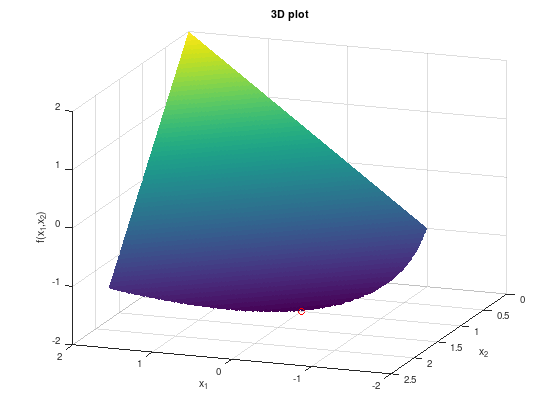

In [2]:
% Optimal point.
px = 0;
py = 1;
pz = -2;

[X1, X2] = meshgrid (linspace (-2, 2, 500),linspace (0, 2.5, 500));
FX = X1 - 2*X2;

% Remove infeasible points.
FX((1 + X1 - X2.^2) < 0) = inf;
surf (X1, X2, FX);
shading flat;
hold on;
plot3 (px, py, pz, 'ro');
xlabel ('x_1');
ylabel ('x_2');
zlabel ('f(x_1,x_2)');
title ('3D plot');
view (200, 20);

Then the logarithmic barrier function gives the unconstrained problem

$$
\min\limits_{x} \beta(x,\mu) :=
x_{1} - 2 x_{2} - \mu \log( 1 + x_{1} - x_{2}^{2} ) - \mu \log( x_{2} )
$$

for a sequence of decreasing barrier parameters.
For a specific parameter $\mu$,
the first-order necessary conditions for optimality are:

$$
\begin{aligned}
 1 - \frac{\mu}{1 + x_{1} - x_{2}^{2}} & = 0, \\
-2 - \frac{2 \mu x_{2}}{1 + x_{1} - x_{2}^{2}} - \frac{\mu}{x_{2}} & = 0.
\end{aligned}
$$

If the constraints are strictly satisfied,
the denominators are positive.
An equation for $x_{2}$ can be derived:

$$
x_{2}^{2} - x_{2} - \frac{1}{2}\mu = 0.
$$

This equation can be solved to determine $x_{2}$ and $x_{1}$ in terms of $\mu$:

$$
\begin{aligned}
x_{1}(\mu) &= \frac{\sqrt{1 + 2\mu} + 3\mu - 1}{2}, \\
x_{2}(\mu) &= \frac{\sqrt{1 + 2\mu} + 1}{2}.
\end{aligned}
$$

The unconstrained objective is strictly convex
and hence this solution is the unique local minimizer in the feasible region.
As $\mu$ approaches zero

$$
\begin{aligned}
\lim_{\mu \to 0_{+}} x_{1}(\mu) &= \frac{\sqrt{1 + 2\mu} + 3\mu - 1}{2} &= 0, \\
\lim_{\mu \to 0_{+}} x_{2}(\mu) &= \frac{\sqrt{1 + 2\mu} + 1}{2} &= 1.
\end{aligned}
$$

One can verify that $x^{*} = (0, 1)^{T}$ is indeed the solution to this optimization problem.

In [3]:
x1 = @(mu) (sqrt (1 + 2 * mu) + 3 * mu - 1) / 2;
x2 = @(mu) (sqrt (1 + 2 * mu) + 1) / 2;
mu = 10.^(0:-1:-6);
x1 = x1(mu);
x2 = x2(mu);
disp ('  mu        x1(mu)      x2(mu) ')
disp ('-------------------------------')
for i = 1:length (mu)
  fprintf ('10^(%2d)   %.7f   %.7f\n', -i + 1, x1(i), x2(i));
end

  mu        x1(mu)      x2(mu) 
-------------------------------
10^( 0)   1.8660254   1.3660254
10^(-1)   0.1977226   1.0477226
10^(-2)   0.0199752   1.0049752
10^(-3)   0.0019998   1.0004998
10^(-4)   0.0002000   1.0000500
10^(-5)   0.0000200   1.0000050
10^(-6)   0.0000020   1.0000005


This example demonstrates a number of features typical for IPMs:

- If $f(x)$ is convex,
  then $\beta(x,\mu)$ is strictly convex,
  since the barrier function is strictly convex,
  and the minimizer $x(\mu)$ is unique.
- **Central path**
  $\{ x(\mu) := \arg\min\limits_{x} \beta(x,\mu) \colon \mu > 0 \}$.
  IPMs that maintain close to the central path are called
  **path-following IPMs**.
  Under mild conditions **convergence** to the optimal solution can be proved.
- Disadvantage: **ill-conditioning** of the Hessian matrix of $\beta(x,\mu)$
  for small $\mu > 0$.

## IPM: Example 2 - Ill-conditioned Hessian matrix

Consider the non-linear optimization problem:

$$
\begin{array}{llll}
\textrm{minimize}   & f(x)     =& x_{1}^{2} + x_{2}^{2} & \\
\textrm{subject to} & g_{1}(x) =& x_{1} - 1 &\geq 0, \\
& g_{2}(x) =& x_{2} + 1 &\geq 0.
\end{array}
$$

The solution to this problem is $x^{*} = (1, 0)^{T}$.
The first inequality is active at $x^{*}$,
and the corresponding Lagrange multiplier is $\lambda_{1}^{*} = 2$.
The second constraint is inactive;
hence its Lagrange multiplier is $\lambda_{2}^{*} = 0$.

> Try to show this using the [KKT optimality conditions](Theorem9).

The Lagrangian is

$$
L(x,\lambda) :=
x_{1}^{2} + x_{2}^{2} - \lambda_{1} ( x_{1} - 1 ) - \lambda_{2} ( x_{2} + 1 )
$$

and respective the stationary conditions are

$$
\begin{aligned}
\nabla_{x_{1}} L(x,\lambda) &= 2x_{1} - \lambda_{1} = 0, \\
\nabla_{x_{2}} L(x,\lambda) &= 2x_{2} - \lambda_{2} = 0.
\end{aligned}
$$

Suppose the problem is solved via a logarithmic barrier function
using an unconstrained minimization solver such as Newton's method:

$$
\min\limits_{x} \beta(x,\mu) :=
x_{1}^{2} + x_{2}^{2} - \mu \log( x_{1} - 1 ) - \mu \log( x_{2} + 1 )
$$

for a decreasing sequence of barrier parameters $\mu$ that converge to zero.
The first-order necessary conditions for optimality $\nabla_{x} \beta(x,\mu) = 0$ are:

$$
\begin{aligned}
2x_{1} - \underbrace{\frac{\mu}{x_{1} - 1}}_{{\color{red}{KKT\;\lambda_{1}}}} &= 0, \\
2x_{2} - \underbrace{\frac{\mu}{x_{2} + 1}}_{{\color{red}{KKT\;\lambda_{2}}}} &= 0,
\end{aligned}
$$

yielding the unconstrained minimizers

$$
\begin{aligned}
x_{1}(\mu) &= \frac{ 1 + \sqrt{1 + 2\mu}}{2}, \\
x_{2}(\mu) &= \frac{-1 + \sqrt{1 + 2\mu}}{2}.
\end{aligned}
$$

From the KKT stationary conditions for small $\mu > 0$ one obtains

$$
\begin{aligned}
\lambda_{1}(\mu) := 2x_{1}(\mu) \approx 2, \\
\lambda_{2}(\mu) := 2x_{2}(\mu) \approx 0.
\end{aligned}
$$

Since

$$
\nabla_{x,x}^{2} \beta(x,\mu) =
\begin{pmatrix}
2 + \dfrac{\mu}{(x_{1} - 1)^{2}} & 0 \\
0 & 2 + \dfrac{\mu}{(x_{2} - 1)^{2}}
\end{pmatrix}
$$

for small $\mu$

$$
\nabla_{x,x}^{2} \beta(x,\mu) =
\begin{pmatrix}
2 + \dfrac{\lambda_{1}^{2}(\mu)}{\mu} & 0 \\
0 & 2 + \dfrac{\lambda_{2}^{2}(\mu)}{\mu}
\end{pmatrix}
\approx
\begin{pmatrix}
2 + \dfrac{4}{\mu} & 0 \\
0 & 2
\end{pmatrix}
$$

The condition number of the Hessian matrix is approximately equal to

$$
\frac{2 + \frac{4}{\mu}}{2} = 1 + \frac{2}{\mu} = O \left( \frac{1}{\mu} \right).
$$

Hence the matrix is ill-conditioned.
Although the calculations were performed for a point on the barrier trajectory,
the same results will hold at all points in a neighborhood of the solution.

The ill-conditioning of the Hessian rules out unconstrained methods such as
[Newton's method](Newtons_method), trust region methods etc.,
and led to their abandonment.

To get the idea right,
consider the following two plots of the barrier function $\beta(x,\mu)$
for $\mu = 1$ and $\mu = 0.001$.

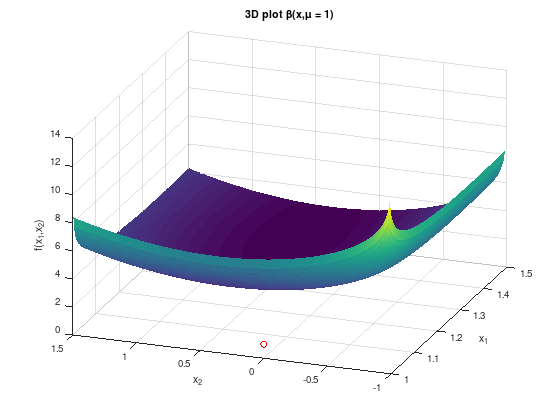

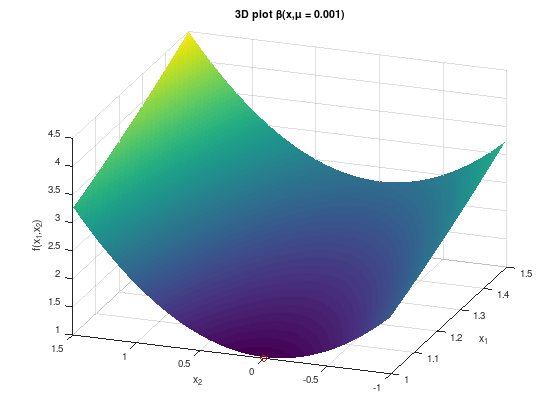

In [4]:
% Optimal point.
px = 1;
py = 0;
pz = 1;

[X1, X2] = meshgrid (linspace (1, 1.5, 200),linspace (-1, 1.5, 200));
FX = @(mu) X1.^2 + X2.^2 - mu .* log( X1 - 1 ) - mu .* log( X2 + 1 );

surf (X1, X2, FX(1));
shading flat;
hold on;
plot3 (px, py, pz, 'ro');
xlabel ('x_1');
ylabel ('x_2');
zlabel ('f(x_1,x_2)');
title ('3D plot \beta(x,\mu = 1)');
view (-70, 30);

figure

surf (X1, X2, FX(0.001));
shading flat;
hold on;
plot3 (px, py, pz, 'ro');
xlabel ('x_1');
ylabel ('x_2');
zlabel ('f(x_1,x_2)');
title ('3D plot \beta(x,\mu = 0.001)');
view (-70, 30);

As seen previous exercises and the theory for unconstrained optimization problems,
the second figure has an "ideal shape" for applying Newton's method,
compared to the first figure.
The minimum (red circle) is clearly at "the bottom" of the bowl-shaped function.
However,
for applying Newton's method the Hessian matrix $\nabla_{x,x}^{2} \beta(x,\mu)$
for $\mu = 0.001$ and smaller
is ill-conditioned and the resulting linear system is difficult to solve.

## A simple transformation

Interest was renewed in 1984 by Karmarkar's paper {cite}`Karmarkar1984`.
Consider a general optimization problem:

$$
\begin{array}{lll}
\textrm{minimize}   & f(x)             & \\
\textrm{subject to} & g_{i}(x) \leq 0, & i = 1, \ldots, m, \\
                    & h_{j}(x) =    0, & j = 1, \ldots, p,
\end{array}
$$

The optimality conditions of our barrier problem

$$
\textrm{minimize}\quad \beta(x,\mu,y) :=
f(x) - \mu \displaystyle\sum_{i = 1}^{m}\log(g_{i}(x))
+ \displaystyle\sum_{j = 1}^{p} y_{j} h_{j}(x)
$$

with lagrange multiplier $y \in \mathbb{R}^{p}$ are

$$
\begin{aligned}
\nabla_{x} \beta(x,\mu,y)
= \nabla f(x) - \displaystyle\sum_{i = 1}^{m} {\color{red}{\frac{\mu}{g_{i}(x)}}} \nabla g_{i}(x)
  + \displaystyle\sum_{j = 1}^{p} y_{j} \nabla h_{j}(x) & \\
= \nabla f(x) - \displaystyle\sum_{i = 1}^{m} {\color{red}{s_{i}}} \nabla g_{i}(x) 
  + \displaystyle\sum_{j = 1}^{p} y_{j} \nabla h_{j}(x) &= 0 \\
g_{i}(x) &> 0, \quad i = 1, \ldots, m, \\
h_{j}(x) &= 0, \quad j = 1, \ldots, p,
\end{aligned}
$$

with the additional variables $s_{i} := \dfrac{\mu}{g_{i}(x)} > 0$ for interior points.

Hence,
the **first-order optimality conditions of the barrier problem** are

$$
\begin{aligned}
\nabla f(x) - \displaystyle\sum_{i = 1}^{m} s_{i} \nabla g_{i}(x) 
  + \displaystyle\sum_{j = 1}^{p} y_{j} \nabla h_{j}(x) &= 0, \\
h_{j}(x) &= 0, \\
g_{i}(x) &> 0, \\
{\color{red}{s_{i} g_{i}(x)}} &= {\color{red}{\mu}}, \\
s_{i} &> 0,
\end{aligned}
$$

for $i = 1, \ldots, m$ and $j = 1, \ldots, p$.

The equations can be rewritten as **non-linear system of equations**:

$$
\begin{aligned}
\nabla f(x) - G'(x)^{T}s + H'(x)^{T}y &= 0, \\
h(x) &= 0, \\
{\color{red}{G(x)s \;-\; M}} &= 0,
\end{aligned}
$$

with
$G(x) := \begin{pmatrix} g_{1}(x) & \cdots & 0 \\ \vdots & \ddots & \vdots \\ 0 & \cdots & g_{m}(x) \end{pmatrix}$
and Jacobian matrix
$G'(x) := \begin{pmatrix} \nabla^{T} g_{1}(x) \\ \vdots \\ \nabla^{T} g_{m}(x) \end{pmatrix}$,
$h(x) := \begin{pmatrix} h_{1}(x) \\ \vdots \\ h_{p}(x) \end{pmatrix}$,
$H'(x) := \begin{pmatrix} \nabla^{T} h_{1}(x) \\ \vdots \\ \nabla^{T} h_{p}(x) \end{pmatrix}$,
$s := \begin{pmatrix} s_{1} \\ \vdots \\ s_{m} \end{pmatrix}$,
and $M := \begin{pmatrix} \mu \\ \vdots \\ \mu \end{pmatrix}$.

Finally,
one can apply **Newton's method**

$$
\begin{pmatrix} x^{k + 1} \\ s^{k + 1} \\ y^{k + 1} \end{pmatrix}
= \begin{pmatrix} x^{k} \\ s^{k} \\ y^{k} \end{pmatrix}
+ \begin{pmatrix} \Delta x \\ \Delta s \\ \Delta y \end{pmatrix}.
$$

The **linear Newton equation** has the form (cf. {cite}`Boyd2004`, p. 610):

$$
\begin{pmatrix}
\nabla^{2} f(x^{k}) - \displaystyle\sum_{i = 1}^{m} s^{k}_{i} \nabla^{2} g_{i}(x^{k})
  + \displaystyle\sum_{j = 1}^{p} y^{k}_{j} \nabla^{2} h_{j}(x^{k})
& -G'(x^{k})^{T} & H'(x^{k})^{T} \\
\operatorname {diag}(s^{k}) G'(x^{k}) & G(x^{k}) & 0 \\
H'(x^{k}) & 0 & 0
\end{pmatrix}
\begin{pmatrix} \Delta x \\ \Delta s \\ \Delta y \end{pmatrix}
=
-\begin{pmatrix}
\nabla f(x^{k}) - G'(x^{k})^{T}s^{k} + H'(x^{k})^{T}y^{k} \\
G(x^{k})s^{k} - M \\
h(x^{k})
\end{pmatrix}.
$$

- The Hessian is now well-conditioned due to the additional variables $s$.
- There are several modifications due to solving Newton's equations.

## IPM Example 3 - Linear Program

Consider a [Linear Program](LP) (LP):

$$
\begin{array}{llll}
\textrm{minimize}   & f(x) &= c^{T} x \\
\textrm{subject to} & h(x) &= Ax - b &= 0, \\
& g(x) &= x &\geq 0,
\end{array}
$$

where $c,x \in \mathbb{R}^{n}$,
$A \in \mathbb{R}^{m \times n}$,
and $b \in \mathbb{R}^{m}$,
the comparision operator $\geq$ is element-wise.

Constructing the linear Newton equation above
is straight forward for LPs:

$$
\begin{pmatrix}
0 & -I & A^{T} \\
\operatorname {diag}(s^{k}) & \operatorname {diag}(x^{k}) & 0 \\
A & 0 & 0
\end{pmatrix}
\begin{pmatrix} \Delta x \\ \Delta s \\ \Delta y \end{pmatrix}
=
-\begin{pmatrix}
c - s^{k} + A^{T}y^{k} \\
\operatorname {diag}(x^{k})s^{k} - M \\
A x^{k} - b
\end{pmatrix},
$$

where $I \in \mathbb{R}^{n \times n}$ is the unit matrix.

Now the theory should be applied to a small LP
to construct a strongly simplified IPM solution algorithm.
Consider:

$$
\begin{array}{lrl}
\textrm{minimize}   & \begin{pmatrix} 4 & 3 \end{pmatrix} x \\
\textrm{subject to} & \begin{pmatrix} 2 & 4 \\ 3 & 2 \end{pmatrix} x 
&\leq \begin{pmatrix} 220 \\ 150 \end{pmatrix}, \\
& x &\geq 0,
\end{array}
$$

with optimal point $x^{*} = (20, 45)^{T}$
and optimal objective function value $215$.
The set of feasible points is visualized in the following figure.

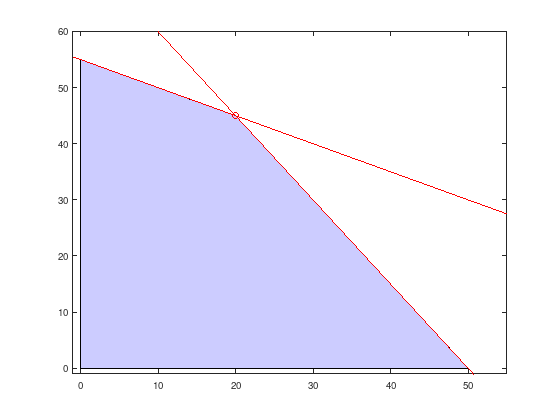

In [5]:
x = linspace (-1, 55, 100);
y1 = (-2 * x + 220) / 4;
y2 = (-3 * x + 150) / 2;
fill ([0, 50,20, 0], [0 0 45, 55], ...
      'b', 'FaceAlpha', 0.2);
hold on;
plot (x, y1, 'r');
plot (x, y2, 'r');
xlim ([-1 55]);
ylim ([-1 60]);
plot (20, 45, 'ro');

### Simplified IPM algorithm for LP

The following listing sketches a very simplified IPM algorithm
to solve Linear Programs.

In [6]:
% LP data converted to equality constraints using slack variables.
c = [ 4 3  0  0 ];
A = [ 2 4 -1  0; ...
      3 2  0 -1 ];
b = [ 220; 150 ];

n = length (c);
m = length (b);

% Hessian matrix for Newton step.
H = @(x,s) [ zeros(n), -eye(n),          A'; ...
              diag(s), diag(x), zeros(n, m); ...
                    A,       zeros(m,n + m) ];

% Gradient vector for Newton step.
G = @(x,s,y,mu) [ c' - s + A' * y; ...
                  x .* s - mu * ones(n, 1); ...
                  A * x - b ];

% Initial values.  x should be an inner LP point.
x = [ 10 10 0 0 ]';
s = ones (n, 1);
y = ones (m, 1);
mu = 0.1;

% Track central path.
xpath = x;

fprintf('Iteration   fval     ||dx||      ||dy||      ||ds||\n')

% Newton iteration.
% Assume 10 steps would be enough.
for i = 1:10

  % Newton step on optimality conditions.
  d = H(x,s) \ -G(x,s,y,mu);
  
  % Stop iteration if x does not change any more.
  if (norm (d(1:n), 'inf') < 1e-6)
    fprintf ('\nIPM converged in step %d.\n\n', i);
    break;
  end

  % Update variables.
  x = x + d(1:n);
  s = s + d((1:n) + n);
  y = y + d((1:m) + (n * 2));
  
  mu = mu^2;  % Shrink mu fast. 
  
  % Output step statistics.
  xpath(:,end+1) = x;
  fprintf('%5d      %.2f   %.2e    %.2e    %.2e\n', ...
    i, c*x, ...
    norm (d(1:n), 'inf'), ...
    norm (d((1:m) + n), 'inf'), ...
    norm (d((1:m) + (n * 2)), 'inf'));
end

% Output optimal point.
x = x'

Iteration   fval     ||dx||      ||dy||      ||ds||
    1      215.14   3.50e+01    4.49e+00    2.19e+00
    2      214.97   1.32e-01    3.49e+00    1.06e+00
    3      215.00   9.86e-02    2.76e-03    2.06e-03
    4      215.00   5.47e-04    1.06e-05    4.06e-06

IPM converged in step 5.

x =

   2.0000e+01   4.5000e+01   7.6510e-08   7.9108e-09



After five steps an optimal point with accuracy of $10^{-6}$ was found.
The **central path** is shown in the following figure.

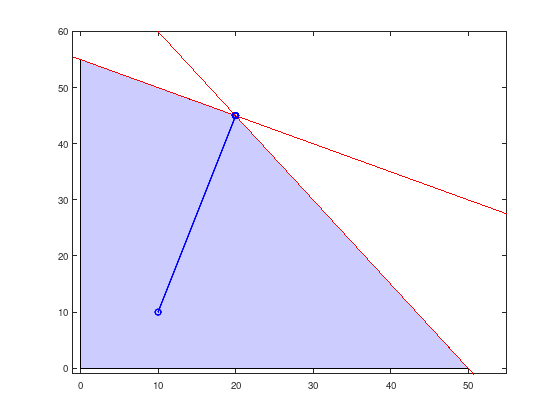

In [7]:
x = linspace (-1, 55, 100);
y1 = (-2 * x + 220) / 4;
y2 = (-3 * x + 150) / 2;
fill ([0, 50,20, 0], [0 0 45, 55], ...
      'b', 'FaceAlpha', 0.2);
hold on;
plot (x, y1, 'r');
plot (x, y2, 'r');
xlim ([-1 55]);
ylim ([-1 60]);
plot (20, 45, 'ro');
plot (xpath(1,:), xpath(2,:), 'bo-', 'LineWidth', 2)

Already after the first step the simple IPM computes a point
close to the optimal point and only improves the accuracy
with decreasing values of $\mu$.

## Summarizing

- Interior-Point Methods (IPMs) impose a penalty for reaching the boundary
  of an inequality constraint.
- IPM uses a barrier function
  $\beta(x,\mu) := f(x) - \mu \displaystyle\sum_{i = 1}^{m}\log(g_{i}(x))$
  to achieve this goal.
- Solving the first-order optimality condition with Newton's Method
  is difficult due to an **ill-conditioned Hessian matrix**.
- Introducing additional variables $s_{i} := \frac{\mu}{g_{i}(x)} > 0$
  improves the Hessian matrix condition,
  but increases the system to solve.
  Specialized solving techniques are required for practical applications.
- A simplified IPM for LP problems has been presented.
- Suggested reading {cite}`Griva2008` (chapter 16).